In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon

# 1.最近的点

## shapely.ops.nearest_points(geom1, geom2)

### 返回输入几何对象中最近的一组点组成的元组。这些点的返回顺序与输入几何对象的顺序相同。

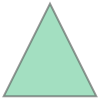

In [2]:
from shapely.ops import nearest_points

triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
triangle

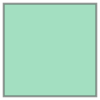

In [3]:
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
square

<AxesSubplot:>

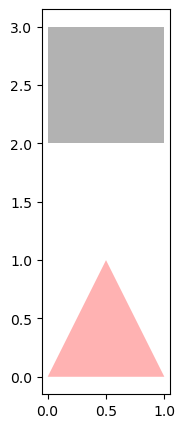

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([triangle] , columns=["geometry"]).plot(ax=ax , facecolor="red" ,alpha=0.3)
gpd.GeoDataFrame([square] , columns=["geometry"]).plot(ax=ax , facecolor="k" ,alpha=0.3)

In [5]:
result = nearest_points(triangle , square)
result

(<POINT (0.5 1)>, <POINT (0.5 2)>)

<AxesSubplot:>

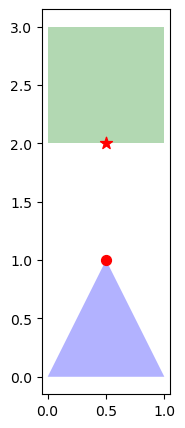

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([triangle] , columns=["geometry"]).plot(ax=ax , facecolor="blue" ,alpha=0.3)
gpd.GeoDataFrame([square] , columns=["geometry"]).plot(ax=ax , facecolor="green" ,alpha=0.3)
gpd.GeoDataFrame([result[0]] , columns=["geometry"]).plot(ax=ax , facecolor="red" , marker="o" , markersize=50)
gpd.GeoDataFrame([result[1]] , columns=["geometry"]).plot(ax=ax , facecolor="red" , marker="*" , markersize=80)

# 2.对齐

## shapely.ops.snap(geom1, geom2, tolerance)

### 将geom1中的顶点与geom2中的顶点对齐，被捕捉的几何体对象副本会被返回，输入的几何对象不会被修改。

### tolerance参数指定了执行对齐操作的顶点之间的最小距离。

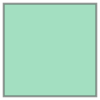

In [7]:
from shapely.ops import snap

square = Polygon([(1,1), (2, 1), (2, 2), (1, 2), (1, 1)])
square

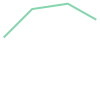

In [8]:
line = LineString([(0,0), (0.8, 0.8), (1.8, 0.95), (2.6, 0.5)])
line

<AxesSubplot:>

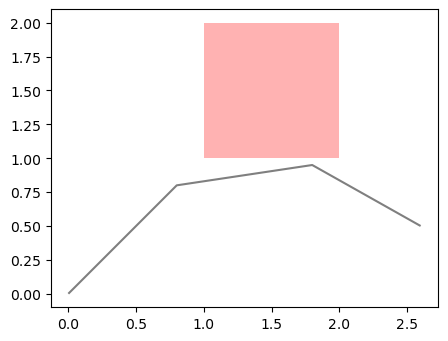

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([square] , columns=["geometry"]).plot(ax=ax , facecolor="red" ,alpha=0.3)
gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax , edgecolor="k" ,alpha=0.5)

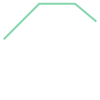

In [10]:
result1 = snap(line , square , 0.5)
result1

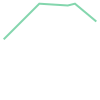

In [11]:
result2 = snap(line , square , 0.2)
result2

Text(0.5, 1.0, 'tolerance = 0.2')

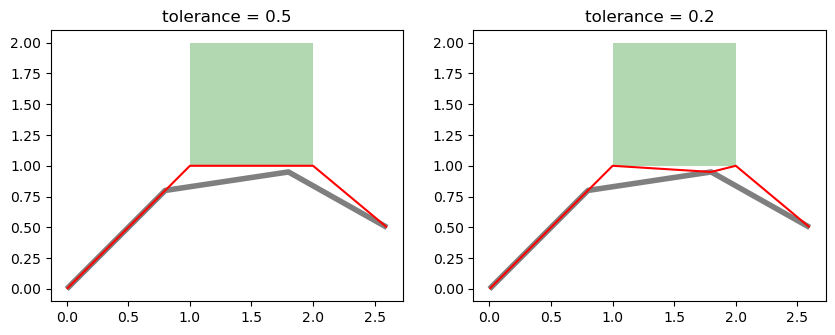

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,2,figsize=(10,10))

gpd.GeoDataFrame([square] , columns=["geometry"]).plot(ax=ax[0] , facecolor="green" ,alpha=0.3)
gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[0] , edgecolor="k" ,alpha=0.5 , linewidth=4)
gpd.GeoDataFrame([result1] , columns=["geometry"]).plot(ax=ax[0] , edgecolor="red")
ax[0].set_title("tolerance = 0.5" , fontsize=12)

gpd.GeoDataFrame([square] , columns=["geometry"]).plot(ax=ax[1] , facecolor="green" ,alpha=0.3)
gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax[1] , edgecolor="k" ,alpha=0.5 , linewidth=4)
gpd.GeoDataFrame([result2] , columns=["geometry"]).plot(ax=ax[1] , edgecolor="red")
ax[1].set_title("tolerance = 0.2" , fontsize=12)

# 3.共享路径

## shapely.ops.shared_paths(geom1, geom2)

### 查找geom1和geom2之间的共享路径，其中两个几何对象都是LineString类型。

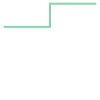

In [13]:
from shapely.ops import shared_paths

g1 = LineString([(0, 0), (10, 0), (10, 5), (20, 5)])
g1

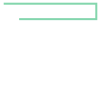

In [14]:
g2 = LineString([(5, 0), (30, 0), (30, 5), (0, 5)])
g2

<AxesSubplot:>

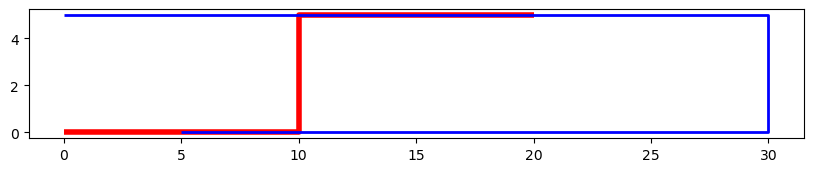

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(10,10))

gpd.GeoDataFrame([g1] , columns=["geometry"]).plot(ax=ax , edgecolor="red", linewidth=4)
gpd.GeoDataFrame([g2] , columns=["geometry"]).plot(ax=ax , edgecolor="blue", linewidth=2)

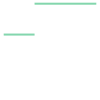

In [16]:
shared_paths(g1 , g2)

In [17]:
forward , backward = shared_paths(g1 , g2).geoms

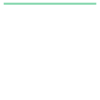

In [18]:
forward

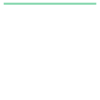

In [19]:
backward

<AxesSubplot:>

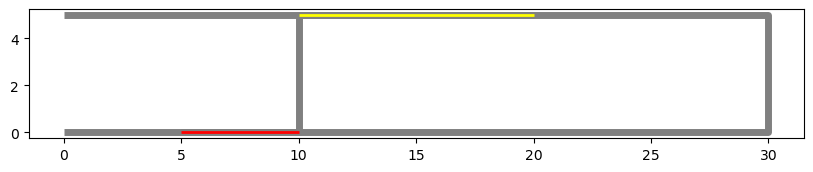

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(10,10))

gpd.GeoDataFrame([g1] , columns=["geometry"]).plot(ax=ax , edgecolor="gray", linewidth=5)
gpd.GeoDataFrame([g2] , columns=["geometry"]).plot(ax=ax , edgecolor="gray", linewidth=5)

gpd.GeoDataFrame([forward] , columns=["geometry"]).plot(ax=ax , edgecolor="red", linewidth=2)
gpd.GeoDataFrame([backward] , columns=["geometry"]).plot(ax=ax , edgecolor="yellow", linewidth=2)

# 4.分割

## shapely.ops.split(geom, splitter)

### 将一个几何对象与另一个几何对象分割，并返回一个几何集合。这个函数在理论上与分割后的几何对象部分的联合操作相反。如果分割器没有分割几何对象，则返回一个与输入几何对象相同的单一几何集合。

In [21]:
from shapely.ops import split

point = Point((1, 1))
line = LineString([(0,0), (2,2)])

<AxesSubplot:>

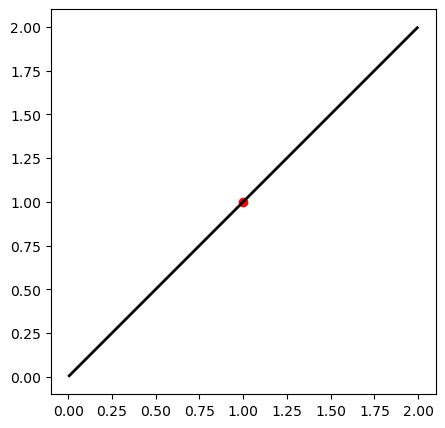

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([point] , columns=["geometry"]).plot(ax=ax , facecolor="red")
gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax , edgecolor="k", linewidth=2)

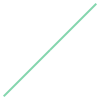

In [23]:
result = split(line , point)
result

In [24]:
list(result.geoms)

[<LINESTRING (0 0, 1 1)>, <LINESTRING (1 1, 2 2)>]

<AxesSubplot:>

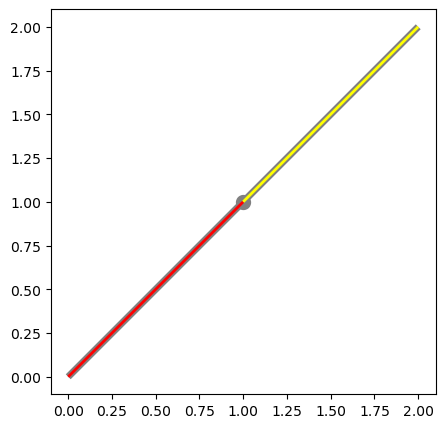

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([point] , columns=["geometry"]).plot(ax=ax , facecolor="gray", linewidth=5)
gpd.GeoDataFrame([line] , columns=["geometry"]).plot(ax=ax , edgecolor="gray", linewidth=5)

gpd.GeoDataFrame([result.geoms[0]] , columns=["geometry"]).plot(ax=ax , edgecolor="red", linewidth=2)
gpd.GeoDataFrame([result.geoms[1]] , columns=["geometry"]).plot(ax=ax , edgecolor="yellow", linewidth=2)